# Clustering Trump's tweets using Kmeans and DBscan



In [1]:
from sklearn.cluster import KMeans, DBSCAN
import pandas as pd
import matplotlib.pyplot as plt

path = r'C:\Users\Dominik\Desktop\Studia\Programowanie dla analityki danych\trumptweets_data.csv'

#reading data set
df = pd.read_csv(path, delimiter=';')

df.head()

,A,B,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,Be sure to tune in and watch Donald Trump on L...,NaN,23,"98,23","66,81","54,89","93,61","23,00","13,04","73,91",...,"0,00","0,00","0,00","0,00","4,35","0,00","0,00","0,00","0,00","0,00"
1,Donald Trump will be appearing on The View tom...,NaN,22,"96,54","81,84","31,94","94,75","22,00","31,82","90,91",...,"0,00","0,00","0,00","0,00","4,55","0,00","0,00","0,00","0,00","0,00"
2,Donald Trump reads Top Ten Financial Tips on L...,NaN,20,"96,79","50,00","15,86","96,76","20,00","15,00","50,00",...,"0,00","5,00","0,00","0,00","5,00","5,00","0,00","0,00","0,00","10,00"
3,New Blog Post: Celebrity Apprentice Finale and...,NaN,17,"97,21","50,00","99,00","25,77","17,00","29,41","76,47",...,"0,00","11,76","0,00","0,00","0,00","0,00","0,00","0,00","0,00","11,76"
4,"""My persona will never be that of a wallflower...",NaN,20,"25,89","2,31","74,76","25,77","10,00","10,00","65,00",...,"0,00","0,00","0,00","0,00","0,00","15,00","10,00","5,00","0,00","0,00"


In [2]:
df.shape

(41121, 95)

In [3]:
df.SemiC.value_counts()

#SemiC column contain only 0s values. We can remove this column

0,00    41121
Name: SemiC, dtype: int64

In [4]:
df.drop(['A','B','SemiC'], inplace=True, axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41121 entries, 0 to 41120
Data columns (total 92 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   WC            41121 non-null  int64 
 1   Analytic      41121 non-null  object
 2   Clout         41121 non-null  object
 3   Authentic     41121 non-null  object
 4   Tone          41121 non-null  object
 5   WPS           41121 non-null  object
 6   Sixltr        41121 non-null  object
 7   Dic           41121 non-null  object
 8   function      41121 non-null  object
 9   pronoun       41121 non-null  object
 10  ppron         41121 non-null  object
 11  i             41121 non-null  object
 12  we            41121 non-null  object
 13  you           41121 non-null  object
 14  shehe         41121 non-null  object
 15  they          41121 non-null  object
 16  ipron         41121 non-null  object
 17  article       41121 non-null  object
 18  prep          41121 non-null  object
 19  auxv

Apart form WC column, all are string types. Let's convert them to float type.

In [6]:
#convert string columns to float
columns_to_float = df.iloc[:,1:].columns
for col in columns_to_float:
     df[col] = df[col].str.replace(",", ".").astype(float)

#checking if there is any negative value in our data set        
(df.values < 0).any() 

#standardization of df 
df = (df - df.min()) / (df.max() - df.min())

False

In [8]:
km = KMeans()
km.fit(df)

KMeans()

In [9]:
#count centers for each cluster 
scores_km = pd.DataFrame(km.cluster_centers_,columns=df.keys())

#count mean, std, max and min value for each cluster using categories
score_mean_km = scores_km.mean(axis=1)
score_max_km = scores_km.max(axis=1)
score_min_km = scores_km.min(axis=1)
score_std_km = scores_km.std(axis=1)

df['cluster_Kmeans'] = km.labels_
cluster_values = df['cluster_Kmeans'].value_counts().sort_index()
scores_km = cluster_values.to_frame()
scores_km['mean'] = score_mean_km
scores_km['max'] = score_max_km
scores_km['min'] = score_min_km
scores_km['std'] = score_std_km
scores_km

,cluster_Kmeans,mean,max,min,std
0,8401,0.076983,0.893817,2.497203e-04,0.140963
1,4919,0.089889,0.809225,5.953243e-04,0.156579
2,5080,0.100056,0.966522,2.992913e-04,0.181869
3,9127,0.089028,0.973273,2.471787e-04,0.172555
4,1174,0.041530,0.994340,-1.776357e-15,0.170416
5,1991,0.078126,0.914218,3.206957e-04,0.167127
6,5172,0.088605,0.783112,6.232792e-04,0.135204
7,5257,0.098029,0.980077,9.629066e-04,0.166192


In [10]:
cluster_values = df['cluster_Kmeans'].value_counts().sort_index()

<AxesSubplot:title={'center':'Cluster counts by KMeans'}>

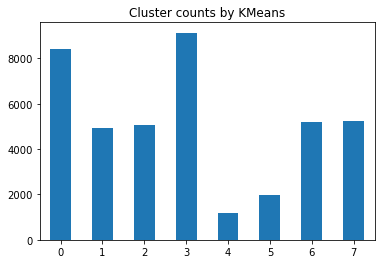

In [11]:
cluster_values.plot.bar(rot=0, title='Cluster counts by KMeans')

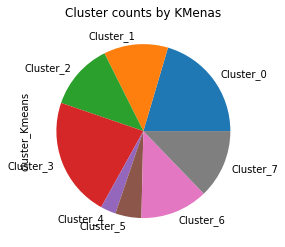

In [12]:
cluster_values.plot.pie(labels=['Cluster_0', 'Cluster_1', 'Cluster_2', 
                                'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7'])
plt.title('Cluster counts by KMenas')
plt.show()

2 96195.9
3 52624.5
4 43253.3
5 37124.5
6 32614.7
7 28520.5
8 25913.6
9 25330.8
10 24753.1
11 24335.4


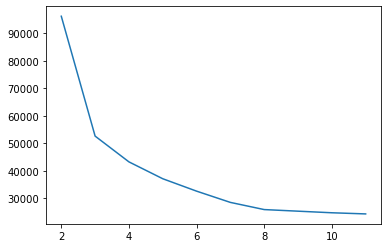

In [13]:
#looking for best cluster numbers for KMeans
inertias = []
for k in range(2,12):
    km= KMeans(k).fit(df)
    inertias.append(round(km.inertia_,1))
    print(k,round(km.inertia_,1))
plt.plot(list(range(2,12)),inertias)
plt.show()

It seeems that KMeans algorithm took the most optimal number of clusters: 8. Plot above confirm it. The most visible decline on the chart starts from 2 number of clusters and ends at 8.

In [14]:
df.drop(columns=['cluster_Kmeans'], inplace=True, axis=1)

In [15]:
min_samples = df.shape[1] * 2
db = DBSCAN(eps=0.5, min_samples=min_samples)
clusters_db = db.fit_predict(df)
print('Clusters created: ' + str(list(set(clusters_db))))

Clusters created: [0, 1, 2, -1]


<AxesSubplot:title={'center':'Cluster counts by DBscan'}>

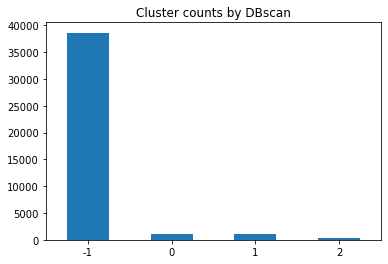

In [16]:
df['cluster_dbscan'] = db.labels_
cluster_db_values = df['cluster_dbscan'].value_counts().sort_index()
cluster_db_values.plot.bar(rot=0, title='Cluster counts by DBscan')

In [17]:
db_1_cluster = df[df['cluster_dbscan'] == -1]
db_2_cluster = df[df['cluster_dbscan'] == 0]
db_3_cluster = df[df['cluster_dbscan'] == 1]
db_4_cluster = df[df['cluster_dbscan'] == 2]

#first calculate the mean for each column depends on cluster group. Then we calculate the mean in in each cluster 
#from all columns. We also calculating max, min and std.
db_mean1 = db_1_cluster.iloc[:,:-1].mean().mean()
db_max1 = db_1_cluster.iloc[:,:-1].mean().max()
db_min1 = db_1_cluster.iloc[:,:-1].mean().min()
db_std1 = db_1_cluster.iloc[:,:-1].mean().std()

db_mean2 = db_2_cluster.iloc[:,:-1].mean().mean()
db_max2 = db_2_cluster.iloc[:,:-1].mean().max()
db_min2 = db_2_cluster.iloc[:,:-1].mean().min()
db_std2 = db_2_cluster.iloc[:,:-1].mean().std()

db_mean3 = db_3_cluster.iloc[:,:-1].mean().mean()
db_max3 = db_3_cluster.iloc[:,:-1].mean().max()
db_min3 = db_3_cluster.iloc[:,:-1].mean().min()
db_std3 = db_3_cluster.iloc[:,:-1].mean().std()

db_mean4 = db_4_cluster.iloc[:,:-1].mean().mean()
db_max4 = db_4_cluster.iloc[:,:-1].mean().max()
db_min4 = db_4_cluster.iloc[:,:-1].mean().min()
db_std4 = db_4_cluster.iloc[:,:-1].mean().std()

s_mean = pd.Series([db_mean1, db_mean2, db_mean3, db_mean4], index=[-1,0,1,2])
s_max = pd.Series([db_max1, db_max2, db_max3, db_max4], index=[-1,0,1,2])
s_min = pd.Series([db_min1, db_min2, db_min3, db_min4], index=[-1,0,1,2])
s_std = pd.Series([db_std1, db_std2, db_std3, db_std4], index=[-1,0,1,2])

scores_db = cluster_db_values.to_frame()
scores_db['mean'] = s_mean
scores_db['max'] = s_max
scores_db['min'] = s_min
scores_db['std'] = s_std

scores_db

,cluster_dbscan,mean,max,min,std
-1,38634,0.088760,0.712035,0.000489,0.145635
0,1165,0.041466,1.000000,0.000000,0.170876
1,994,0.082564,0.989131,0.000000,0.179472
2,328,0.085680,0.993347,0.000000,0.214265


In [18]:
scores_km

,cluster_Kmeans,mean,max,min,std
0,8401,0.076983,0.893817,2.497203e-04,0.140963
1,4919,0.089889,0.809225,5.953243e-04,0.156579
2,5080,0.100056,0.966522,2.992913e-04,0.181869
3,9127,0.089028,0.973273,2.471787e-04,0.172555
4,1174,0.041530,0.994340,-1.776357e-15,0.170416
5,1991,0.078126,0.914218,3.206957e-04,0.167127
6,5172,0.088605,0.783112,6.232792e-04,0.135204
7,5257,0.098029,0.980077,9.629066e-04,0.166192
